In [74]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df=pd.read_excel('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Product Review Daraz.xlsx')

In [78]:
file_path='/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Daraz.xlsx'

In [79]:
newdf = df.copy()

In [80]:
df.head()

,Comments,Class,translated,sentiment
0,আমি মনে করি আমি আমার টাকা অপচয়,Negative,I think I'm a waste of my money,Negative
1,অবিশ্বাস্য মানের,Positive,incredible quality,Positive
2,আপনার টাকা নষ্ট করবেন না,Negative,Don't waste your money,Negative
3,আমাকে হতাশ করেনি,Positive,Did not disappoint me,Positive
4,আমি আপনার কাছ থেকে নিষ্ক্রিয় পণ্য পেয়েছি যা ...,Negative,I got from you inactive products that are very...,Negative


In [81]:
df=df.drop(["Comments","Class"],axis=1)

In [82]:
df.columns=["Sentence","sentiment"]

In [83]:
df.shape

(1995, 2)

In [84]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

Total Comment: 1995 
Total Negative : 904 
Total Positive : 1091


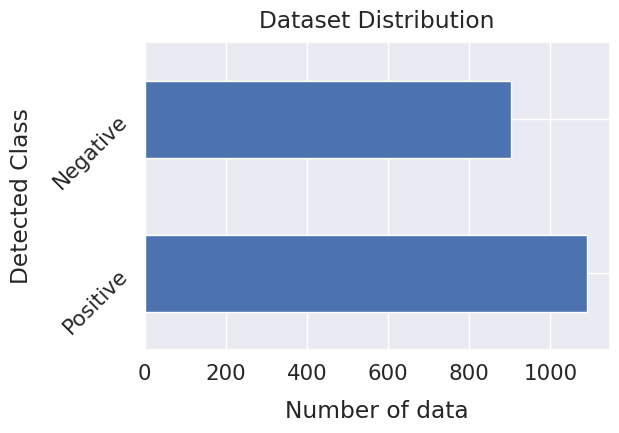

In [85]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

# **Data Preperation and Cleaning**

In [86]:
df.shape

(1995, 2)

# **Removing Duplicate Rows**

In [87]:
# df.drop_duplicates(inplace=True)

In [88]:
df.shape

(1995, 2)

**Lower Case**

In [89]:
df["Lower_Case"] = df["Sentence"].str.lower()
df.head()

,Sentence,sentiment,Lower_Case
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money
1,incredible quality,Positive,incredible quality
2,Don't waste your money,Negative,don't waste your money
3,Did not disappoint me,Positive,did not disappoint me
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...


# **Stopwords Removal**

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [92]:
df['Stopwords']=df['Lower_Case'].apply(process_text)

In [93]:
df.head()

,Sentence,sentiment,Lower_Case,Stopwords
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money,think im waste money
1,incredible quality,Positive,incredible quality,incredible quality
2,Don't waste your money,Negative,don't waste your money,dont waste money
3,Did not disappoint me,Positive,did not disappoint me,disappoint
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...,got inactive products unexpected


In [94]:
df=df.drop(["Sentence","Lower_Case"],axis=1)

**Removing Small Texts**

In [95]:
df['length'] = df['Stopwords'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Stopwords'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 1 Small conversations 
Total conversations: 1994


**Stemming**

In [96]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [97]:
df['Cleantext']=df['Stopwords'].apply(stemming)

In [98]:
df=df.drop(["Stopwords","length"],axis=1)

In [99]:
df.head()

,sentiment,Cleantext
0,Negative,think im waste money
1,Positive,incredible quality
2,Negative,dont waste money
3,Positive,disappoint
4,Negative,got inactive products unexpected


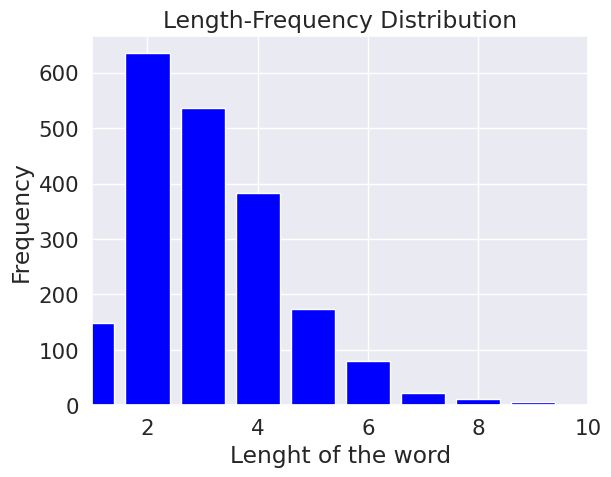

Maximum Length of a comment: 11
Minimum Length of a comment: 1
Average Length of a comment: 3.0


In [100]:
frequency = dict()
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 10)

plt.xlabel('Lenght of the word')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a comment: {max(dataset.length)}")
print(f"Minimum Length of a comment: {min(dataset.length)}")
print(f"Average Length of a comment: {round(np.mean(dataset.length),0)}")

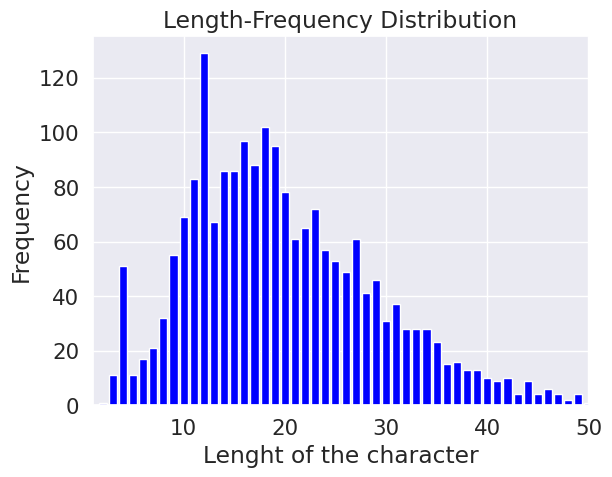

Maximum Length of a comment: 68
Minimum Length of a comment: 0
Average Length of a comment: 20.0


In [101]:
frequency = dict()
for i in dataset.no_char:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 50)

plt.xlabel('Lenght of the character')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a comment: {max(dataset.no_char)}")
print(f"Minimum Length of a comment: {min(dataset.no_char)}")
print(f"Average Length of a comment: {round(np.mean(dataset.no_char),0)}")

In [102]:
df.head()

,sentiment,Cleantext
0,Negative,think im waste money
1,Positive,incredible quality
2,Negative,dont waste money
3,Positive,disappoint
4,Negative,got inactive products unexpected


# **Data Set Summary**

In [103]:
def data_summary(df):
    reviews = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.Cleantext) for word in t.strip().split()]
    class_label= [k for k,v in df.sentiment.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.sentiment==label].Cleantext) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        reviews.append(len(list(df[df.sentiment==label].Cleantext)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(df[df.sentiment==label].Cleantext))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return reviews,words,u_words,class_label

#call the fucntion
reviews,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Comments:1091
Number of Words:3331
Number of Unique Words:785
Most Frequent Words:

good	355
product	160
quality	129
price	110
best	65
better	43
products	38
prices	35
service	35
got	34

Class Name :  Negative
Number of Comments:904
Number of Words:2864
Number of Unique Words:947
Most Frequent Words:

quality	146
product	124
bad	101
good	82
clothes	47
match	32
products	31
money	29
like	28
didnt	27
Total Number of Unique Words:1428


***New Dataframe for Data Summary***

In [104]:
data_matrix = pd.DataFrame({'Total comments':reviews,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

data

,Class Names,Category,Values
0,Positive,Total comments,1091
1,Negative,Total comments,904
2,Positive,Total Words,3331
3,Negative,Total Words,2864
4,Positive,Unique Words,785
5,Negative,Unique Words,947


***Data Summary Visualization***

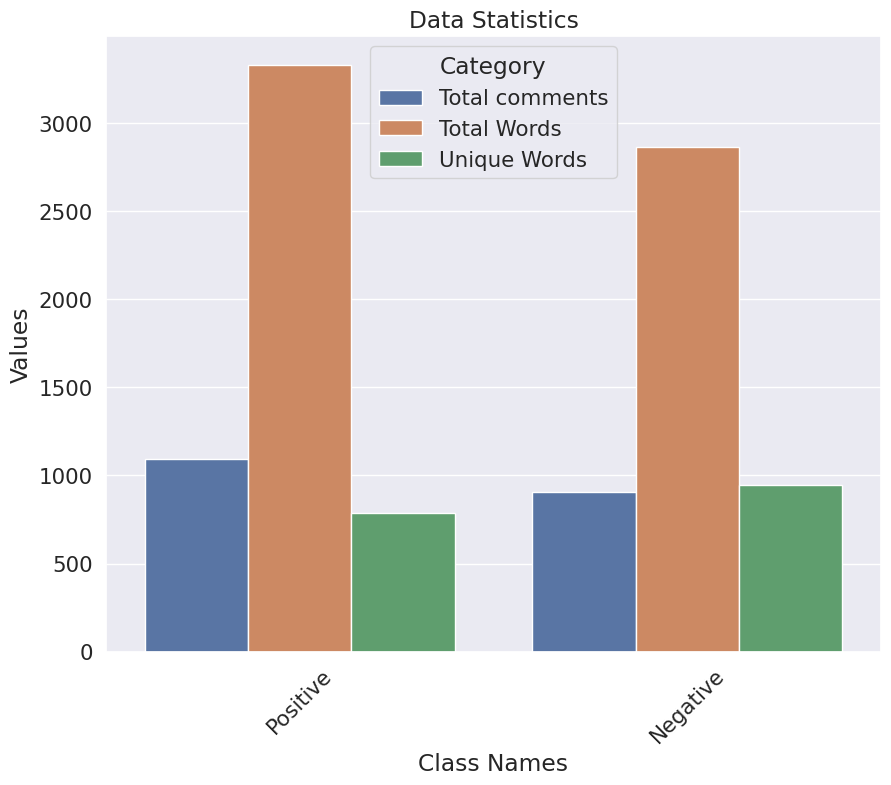

In [105]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()

sns.barplot(data=data,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

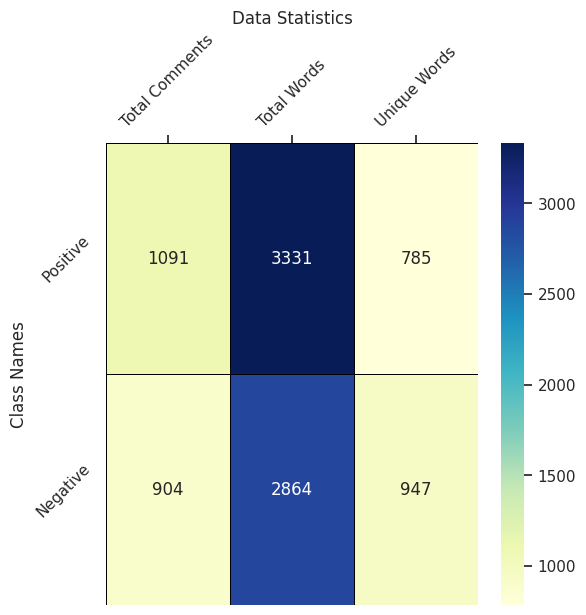

In [106]:
sns.set()
plt.figure(figsize =(6, 6))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Comments", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

In [107]:
sample_data=[10,100]
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [108]:
df.head()

,sentiment,Cleantext
0,Negative,think im waste money
1,Positive,incredible quality
2,Negative,dont waste money
3,Positive,disappoint
4,Negative,got inactive products unexpected


## **Label Encoding Function**

In [109]:
import keras
import tensorflow
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder

In [110]:
def label_encoding(df,bool):
  '''
  This function will convert categorical class names into a numeric label 
  '''
  le = LabelEncoder()
  le.fit(df.sentiment)
  encoded_labels = le.transform(df.sentiment)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels 
def dataset_split(news,Label):
  '''
  This function will split the dataset into Train-Test-Validation set
  '''

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])
  
  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [111]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.Cleantext)
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )    
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.Cleantext)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  print(df.Cleantext[10],"\n",sequences[10]) 

  #==================================== Pad Sequences ============================== 
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.Cleantext[10],"\n",corpus[10])   

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels
  
#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
good 	 437
product 	 284
quality 	 275
price 	 134
bad 	 119
products 	 69
best 	 66
clothes 	 64
like 	 60
better 	 59

Words --> Documents:
good 	 424
product 	 281
quality 	 269
price 	 133
bad 	 118
products 	 68
best 	 65
clothes 	 64
like 	 60
better 	 59

Words --> Index:
resurrected 	 1429
cloak 	 1428
porn 	 1427
unusable 	 1426
special 	 1425
confuses 	 1424
artificial 	 1423
deceives 	 1422
telling 	 1421
merchant 	 1420

Total Documents --> 1995

			====== Encoded Sequences ====== 
Found 1429 unique tokens
problem product 
 [57, 3]

			====== Paded Sequences ======
 problem product 
 [57  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [112]:
#Call Dataset Split Function
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1995 
	Training		 1276 
	Test			 399 
	Validation		 320


In [113]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [114]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Cleantext'].values)
X = tokenizer.texts_to_sequences(df['Cleantext'].values)
X = pad_sequences(X)

In [115]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 64)            32000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 65,154
Trainable params: 65,154
Non-trainable params: 0
_________________________________________________________________


In [116]:
df

,sentiment,Cleantext
0,Negative,think im waste money
1,Positive,incredible quality
2,Negative,dont waste money
3,Positive,disappoint
4,Negative,got inactive products unexpected
...,...,...
1990,Negative,resurrected product
1991,Negative,thought
1992,Negative,like quality
1993,Negative,clothes thin


In [117]:
dataset.head()

,sentiment,Stopwords,length,no_char
0,Negative,think im waste money,4,20
1,Positive,incredible quality,2,18
2,Negative,dont waste money,3,16
3,Positive,disappoint,1,10
4,Negative,got inactive products unexpected,4,32


# ***Unigram Tf-idf value calculation***

In [118]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(Conversations)
    
    return tfidf,X

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [120]:
def ml_models_defination(): 
    
    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']
  
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names 

In [121]:
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
 
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict 

In [122]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])
        
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [123]:
df.head()

,sentiment,Cleantext
0,Negative,think im waste money
1,Positive,incredible quality
2,Negative,dont waste money
3,Positive,disappoint
4,Negative,got inactive products unexpected


# **Tokenization**

In [124]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Cleantext'].values)
X = tokenizer.texts_to_sequences(df['Cleantext'].values)
X = pad_sequences(X)

In [125]:
X

array([[  0,   0,   0, ...,  11,  54,  19],
       [  0,   0,   0, ...,   0, 296,   3],
       [  0,   0,   0, ...,  29,  54,  19],
       ...,
       [  0,   0,   0, ...,   0,   9,   3],
       [  0,   0,   0, ...,   0,   8, 146],
       [  0,   0,   0, ...,   3,   8,   1]], dtype=int32)

In [126]:
np.shape(X)

(1995, 11)

# **Model Creation**

# **LSTM**

In [127]:
X.shape

(1995, 11)

In [147]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(256,activation='softmax'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 64)            32000     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 256)               16640     
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 82,178
Trainable params: 82,178
Non-trainable params: 0
_________________________________________________________________


In [148]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1596, 11) (1596, 2)
(399, 11) (399, 2)


In [149]:
history=model.fit(X_train, Y_train, epochs = 50, batch_size=32, verbose = 1,validation_data=(X_test,Y_test))

Epoch 1/50
50/50 [==============================] - 5s 30ms/step - loss: 0.6923 - accuracy: 0.5351 - val_loss: 0.6904 - val_accuracy: 0.5639
Epoch 2/50
50/50 [==============================] - 2s 37ms/step - loss: 0.6901 - accuracy: 0.5426 - val_loss: 0.6858 - val_accuracy: 0.5639
Epoch 3/50
50/50 [==============================] - 2s 40ms/step - loss: 0.6780 - accuracy: 0.5426 - val_loss: 0.6572 - val_accuracy: 0.5639
Epoch 4/50
50/50 [==============================] - 2s 33ms/step - loss: 0.6362 - accuracy: 0.7011 - val_loss: 0.6083 - val_accuracy: 0.8170
Epoch 5/50
50/50 [==============================] - 1s 23ms/step - loss: 0.5895 - accuracy: 0.8421 - val_loss: 0.5755 - val_accuracy: 0.8246
Epoch 6/50
50/50 [==============================] - 1s 23ms/step - loss: 0.5446 - accuracy: 0.8697 - val_loss: 0.5487 - val_accuracy: 0.8346
Epoch 7/50
50/50 [==============================] - 1s 22ms/step - loss: 0.5138 - accuracy: 0.8828 - val_loss: 0.5465 - val_accuracy: 0.8145
Epoch 8/50
50

In [150]:
import tensorflow as tf

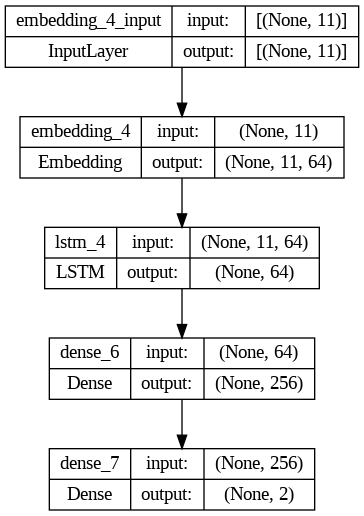

In [151]:
tf.keras.utils.plot_model(model, show_shapes=True)

# **Model Visualization**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-juw7hge6
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-juw7hge6
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done


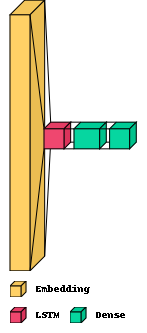

In [152]:
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

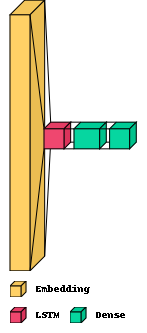

In [153]:
visualkeras.layered_view(model, legend=True) 

# **Evaluation**

In [154]:
score = model.evaluate(X_train, Y_train,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

25/25 - 0s - loss: 0.2721 - accuracy: 0.9204 - 216ms/epoch - 9ms/step
Train loss: 0.27205750346183777
Train accuracy: 0.920426070690155


In [155]:
score = model.evaluate(X_test, Y_test,batch_size=64, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


7/7 - 0s - loss: 0.4551 - accuracy: 0.8145 - 85ms/epoch - 12ms/step
Test loss: 0.45509374141693115
Test accuracy: 0.8145363330841064


# **Learning Curve**

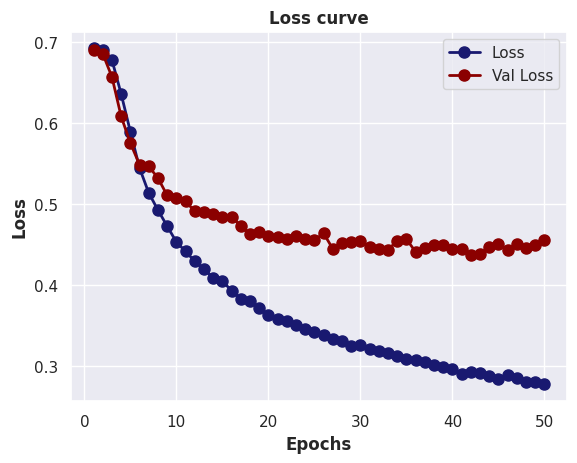

In [156]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])
                  

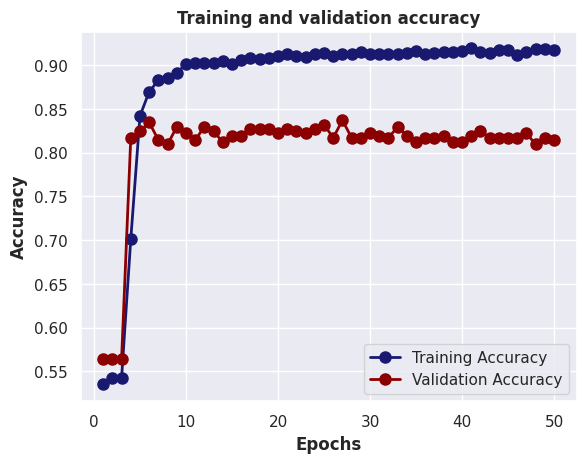

In [157]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

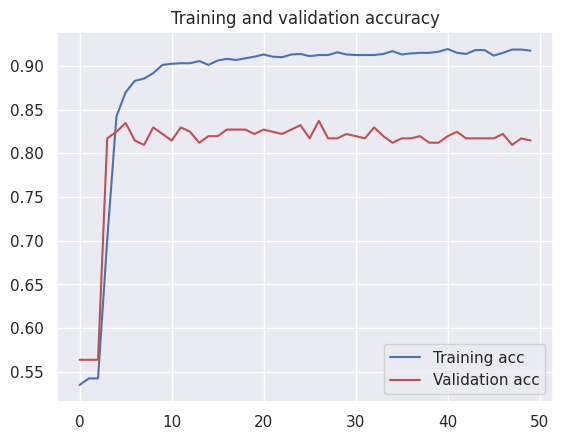

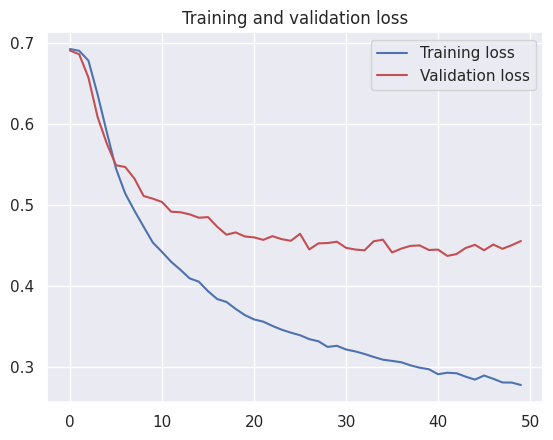

In [158]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### **Confusion Matrix & Classification Report**

In [159]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1596, 11), (1596, 2), (399, 11), (399, 2))

In [160]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 1s 8ms/step
[[132  42]
 [ 32 193]]


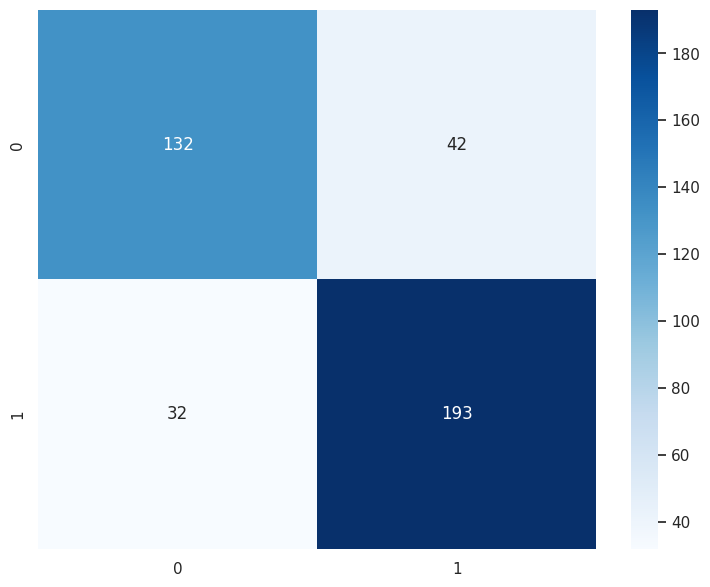

In [161]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cm,cmap='Blues', annot=True,fmt='d')
plt.show()


In [162]:
# print(classification_report(y_test, y_pred))

In [163]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()
report = report.rename(index={'0': 'Positive','1':'Negative'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))

In [164]:
report

,precision,recall,f1-score,support
Positive,80.49,75.86,78.11,174.000000
Negative,82.13,85.78,83.91,225.000000
accuracy,81.45,81.45,81.45,0.814536
macro avg,81.31,80.82,81.01,399.000000
weighted avg,81.41,81.45,81.38,399.000000


In [165]:
twt = ['dont waste money']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 29 54 19]]
1/1 - 0s - 451ms/epoch - 451ms/step
negative
